# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q3.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Kiran Reddy Bhumireddy<br>
Roll Number: 2020101064

### Dataset

Use the code below to load the Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

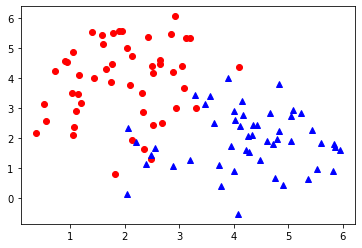

In [3]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')

Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

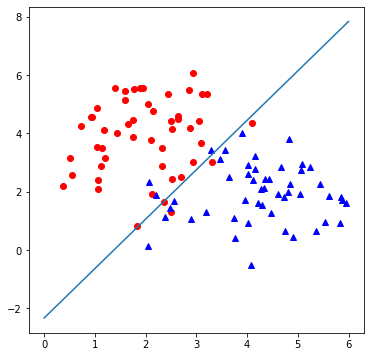

In [4]:
m = len(y)
col = np.ones(len(y), int)
X_new = np.insert(X, 0, col, axis = 1)

w = np.array([1, 1, 1]) ### init w (parameters to estimate)
learning_rate = 2

e = np.exp(-20)

def compute_y_hat(X_new, w, i):
    return (1 / (1 + np.exp(-w @ np.transpose(X_new[i]))))
    
def compute_delta_w(X_new, y, w, m):
    delta_w = np.array([0.0, 0.0, 0.0])
    c = -(learning_rate / m)
    
    for i in range(len(w)):
        for j in range(m):
            delta_w[i] += X_new[j][i] * ((compute_y_hat(X_new, w, j)) - y[j])

    return c * delta_w

while(True):
        delta_w = compute_delta_w(X_new, y, w, m)
        w = w + delta_w

        error = np.sum(np.square(delta_w))

        # print(error)

        if(error < e):
            break

plt.figure(figsize=(6, 6))

plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')

x_coordinates = np.linspace(0, 6, 1000)
y_coordinates = (-1/w[2]) * (w[0] + w[1] * x_coordinates) 

plt.plot(x_coordinates, y_coordinates)

### Questions

1) Explain the approach of Logistic Regression.<br>
   > we use Gradient descent and the below cost function to find the best weights w and the decison boundary will be w<sup>T</sup>X = 0
2) What is the loss function used?<br>
   $cost = -1/m * \Sigma(y * log(y_{pred}) + (1 - y) * log(1 - y_{pred})) $
   
3) Explain if we can use Mean Square Error(MSE) as Loss function.
   > No we can't use MSE as loss function since it is non-convex, it has many global minima 